In [1]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -v -e .
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 9.6 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 MB 4.0 MB/s eta 0:00:00
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16493, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16493 (delta 68), reused 118 (delta 65), pack-reused 16328
Receiving objects: 100% (16493/16493), 43.85 MiB | 30.07 MiB/s, done.
Resolving deltas: 100% (11448/11448), done.
/content/mmsegmentation
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/

In [11]:
!pip install mmcv==2.2.0 -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.2/index.html
!pip install mmdet

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.8 MB/s eta 0:00:00


## Needed edits

*  change MMCV_MAX to '2.2.1' in mmseg/__init__.py and mmdet/__init__.py
*  add in_channels: int = 0 to BaseModule.__init__() in /usr/local/lib/python3.10/dist-packages/mmengine/model/base_module.py



In [1]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [2]:
!mkdir ../checkpoints

!wget https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_r50_8xb2-160k_ade20k-512x512/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth -P ../checkpoints
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

config_file = '/content/mmsegmentation/configs/mask2former/mask2former_r50_8xb2-160k_ade20k-512x512.py'
checkpoint_file = '/content/checkpoints/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth'

--2024-05-11 20:25:09--  https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_r50_8xb2-160k_ade20k-512x512/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.20.183, 47.246.20.186, 47.246.20.181, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270054077 (258M) [application/octet-stream]
Saving to: ‘../checkpoints/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth’

mask2former_r50_8xb 100%[===================>] 257.54M  7.98MB/s    in 32s     

2024-05-11 20:25:42 (8.03 MB/s) - ‘../checkpoints/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth’ saved [270054077/270054077]



In [3]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: /content/checkpoints/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth


In [32]:
# test a single image
img = '/content/download2_6.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

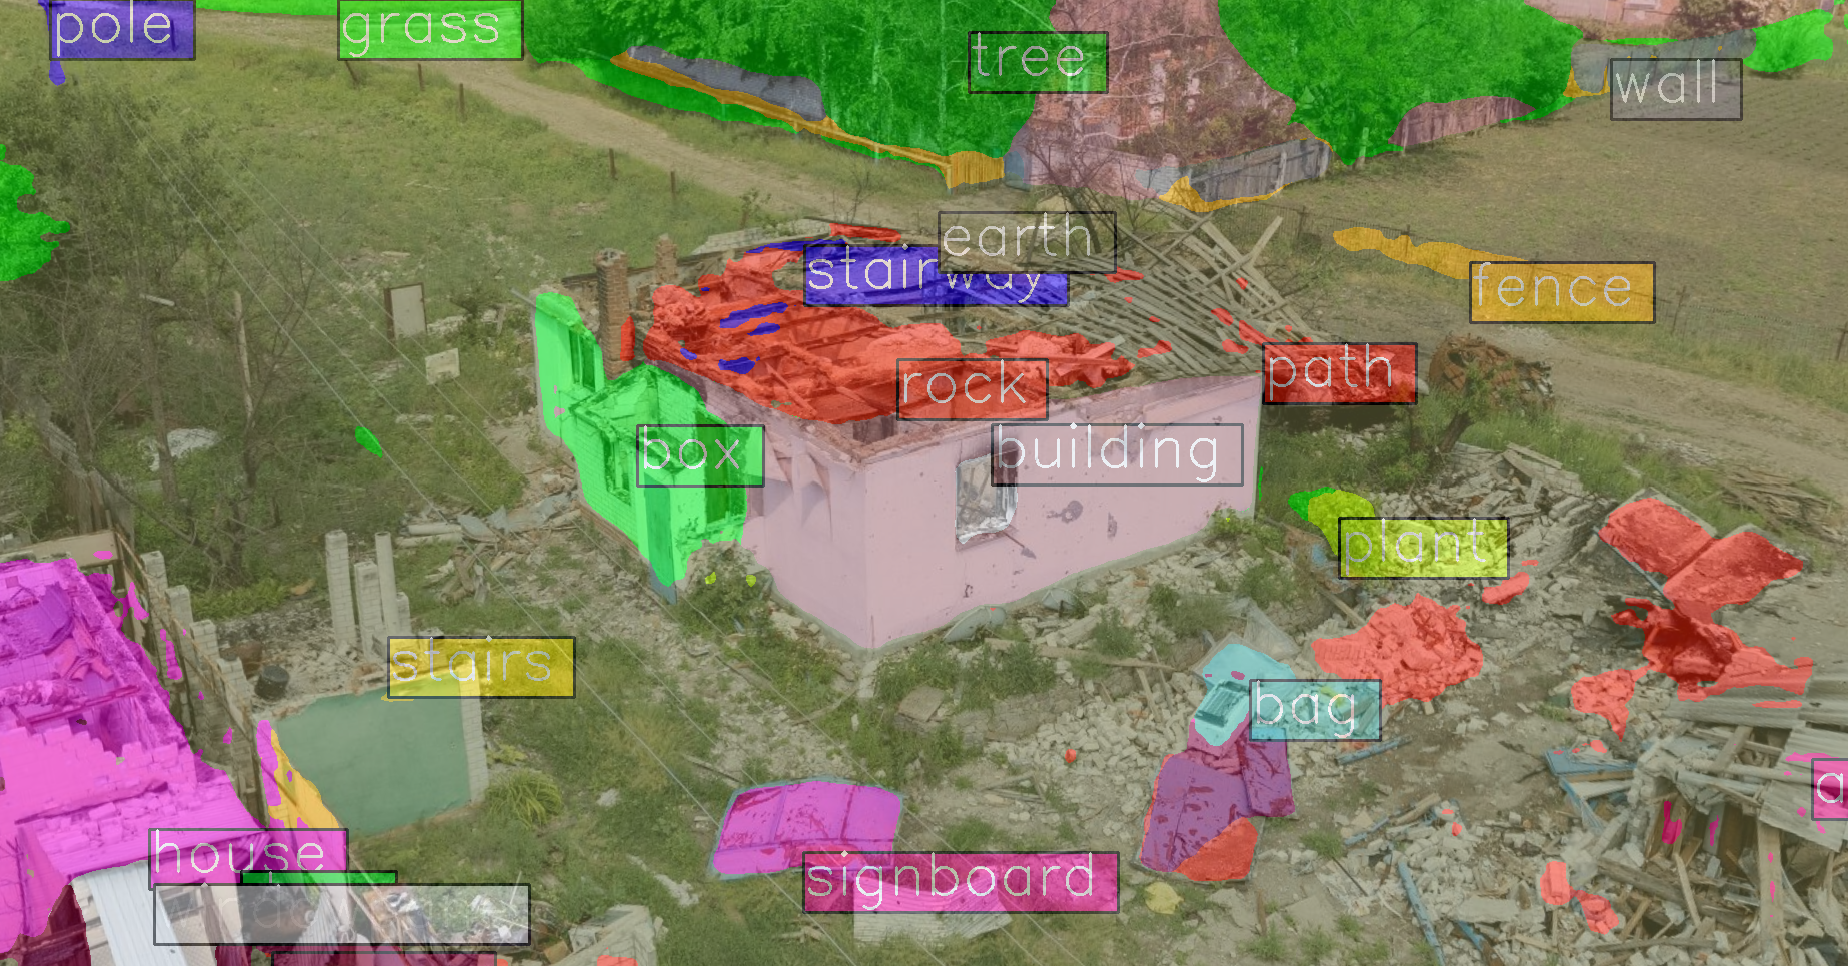

In [33]:
from PIL import Image
vis_result = show_result_pyplot(model, img, result, show=False)
Image.fromarray(vis_result, 'RGB')

---

In [ ]:
# Needs method to read show/read result
from mmseg.apis import MMSegInferencer

inferencer = MMSegInferencer(model='mask2former_r50_8xb2-160k_ade20k-512x512')

result = inferencer('/content/mmsegmentation/demo/demo.png', show=True)